In [3]:
import numpy as np
from itertools import permutations

# Q2) Implementing Gauss Seidel and Gauss Jacobi Methods

(i) Write a function to check whether a given square matrix is diagonally
dominant or not. If not, the function should indicate if the matrix can
be made diagonally dominant by interchanging the rows? Code to be
written and submitted.

In [4]:
def is_diag_dom(A):
    #traverse rows
    for i in range(len(A)):
        row_sum = 0
        #traverse each column value in row
        for j in range(len(A[i])):
            row_sum += abs(A[i][j])
        if abs(A[i][i]) <= row_sum - abs(A[i][i]):
            return False
    return True

In [5]:
def can_diag_dom(A):
    permutation_lst = list(permutations(range(len(A))))
#     print(permutation_lst)
    for order in permutation_lst:
#         print(list(order))
        new_A = A[list(order)]
#         print(new_A)
        # Check row interchanged matrix is diagonally dominant
        if is_diag_dom(new_A):
            print("The matrix can be made diagonally dominant by interchanging the rows")
            print("Diagonally dominant matrix : {}".format(new_A))
            return True
        
    print("The matrix cannot be made diagonally dominant by interchanging the rows")
    return False
            

In [6]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(is_diag_dom(A))
B=np.array([[3,-1],[2,5]])
print(is_diag_dom(B))
A=np.array([[4,2,1],[1,5,-3],[2,-7,9]])
print(is_diag_dom(A))

False
True
False


In [7]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(can_diag_dom(A))
B=np.array([[3,-1],[2,5]])
print(can_diag_dom(B))
A=np.array([[4,2,1],[1,5,-3],[2,-7,9]])
print(can_diag_dom(A))

The matrix cannot be made diagonally dominant by interchanging the rows
False
The matrix can be made diagonally dominant by interchanging the rows
Diagonally dominant matrix : [[ 3 -1]
 [ 2  5]]
True
The matrix cannot be made diagonally dominant by interchanging the rows
False


### Q2.ii) Write a function to generate Gauss Seidel iteration for a given square matrix. 
The function should also return the values of 1,∞ and Frobenius
norms of the iteration matrix. Generate a random 4 × 4 matrix.
Report the iteration matrix and its norm values returned by the function
along with the input matrix.

In [62]:
def GS_iteration(A):
    # L, I , U initialization
    N = len(A)
    L = np.zeros((N,N))
    I = np.identity(N)
    U = np.zeros((N,N))
    D = []
    
    # Get the values in diagonal
    for i in range(N):
        D.append(A[i][i])
    
    # L, I , U decomposition - A = L + I + U
    for i in range(N):
        for j in range(N):
            if j<i:
                L[i][j]=A[i][j]/D[i]
            elif j>i:
                U[i][j]=A[i][j]/D[i]
          
        
#     print("L: \n",L)
#     print("I: \n",I)
#     print("U: \n",U)
    
    tmp1 = I + L
    tmp2 = np.linalg.inv(tmp1)
    tmp3 = np.multiply(tmp2,-1)
    iter_matrix = np.matmul(tmp3, U)
    
#     print("tmp1 = I + L: \n",tmp1)
#     print("tmp2 = np.linalg.inv(tmp1): \n",tmp2)
#     print("tmp3 = np.multiply(tmp2,-1): \n",tmp3)
    

    
    return iter_matrix,tmp2

In [40]:
A = np.random.rand(4,4)
print("Random 4x4 matrix: \n",A)
GS_iteration(A)

Random 4x4 matrix: 
 [[0.89440207 0.39139425 0.62038123 0.47880836]
 [0.54517201 0.9161962  0.77019355 0.44327692]
 [0.30518769 0.71283264 0.44458207 0.22965642]
 [0.20935336 0.0328421  0.57909064 0.36279126]]
L: 
 [[0.         0.         0.         0.        ]
 [0.5950385  0.         0.         0.        ]
 [0.68645974 1.60337694 0.         0.        ]
 [0.57706286 0.09052616 1.59620893 0.        ]]
I: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
U: 
 [[0.         0.43760436 0.69362678 0.53533905]
 [0.         0.         0.8406426  0.48382314]
 [0.         0.         0.         0.516567  ]
 [0.         0.         0.         0.        ]]
tmp1 = I + L: 
 [[1.         0.         0.         0.        ]
 [0.5950385  1.         0.         0.        ]
 [0.68645974 1.60337694 1.         0.        ]
 [0.57706286 0.09052616 1.59620893 1.        ]]
tmp2 = np.linalg.inv(tmp1): 
 [[ 1.          0.          0.          0.        ]
 [-0.5950385   1.          0.          0.        ]

array([[ 0.        , -0.43760436, -0.69362678, -0.53533905],
       [ 0.        ,  0.26039144, -0.42790795, -0.16527579],
       [ 0.        , -0.11710786,  1.16224461,  0.1159211 ],
       [ 0.        ,  0.4158816 , -1.41618209,  0.13885177]])

In [41]:
def norm_1(A):
    N=len(A)
    col_sum = [0]*N
    for i in range(N):
        for j in range(N):
            col_sum[j] += abs(A[i][j])
            
    return max(col_sum)
            

In [44]:
C=np.array([[4,2,1],[1,5,-3],[2,-7,9]])

print("C: \n",C)
norm_1(C)

C: 
 [[ 4  2  1]
 [ 1  5 -3]
 [ 2 -7  9]]


14

In [50]:
def norm_2(A):
    N=len(A)
    square_sum = 0
    for i in range(N):
        for j in range(N):
            square_sum += A[i][j]**2
            
    return square_sum**0.5

In [52]:
C=np.array([[3,-1],[2,5]])

print("C: \n",C)
norm_2(C)

C: 
 [[ 3 -1]
 [ 2  5]]


6.244997998398398

In [45]:
def norm_3(A):
    N=len(A)
    row_sum = [0]*N
    for i in range(N):
        for j in range(N):
            row_sum[i] += abs(A[i][j])
            
    return max(row_sum)

In [47]:
C=np.array([[4,2,1],[1,5,-3],[2,-7,9]])

print("C: \n",C)
norm_3(C)

C: 
 [[ 4  2  1]
 [ 1  5 -3]
 [ 2 -7  9]]


18

### (iii) Repeat part (ii) for the Gauss Jacobi iteration.

In [85]:
def GJ_iteration(A):
    # L, I , U initialization
    N = len(A)
    L = np.zeros((N,N))
    I = np.identity(N)
    U = np.zeros((N,N))
    D = []
    
    # Get the values in diagonal
    for i in range(N):
        D.append(A[i][i])
    
    # L, I , U decomposition - A = L + I + U
    for i in range(N):
        for j in range(N):
            if j<i:
                L[i][j]=A[i][j]/D[i]
            elif j>i:
                U[i][j]=A[i][j]/D[i]
          
        
#     print("L: \n",L)
#     print("I: \n",I)
#     print("U: \n",U)
    
    return -L-U

In [54]:
A = np.random.rand(4,4)
print("Random 4x4 matrix: \n",A)
GJ_iteration(A)

Random 4x4 matrix: 
 [[0.42302892 0.64713311 0.05312413 0.42580581]
 [0.08875337 0.00497688 0.47900154 0.28152766]
 [0.55677987 0.58471817 0.55074726 0.87537099]
 [0.62884182 0.48419509 0.35403041 0.8748831 ]]
L: 
 [[ 0.          0.          0.          0.        ]
 [17.83313751  0.          0.          0.        ]
 [ 1.01095349  1.06168148  0.          0.        ]
 [ 0.7187724   0.55343976  0.40466025  0.        ]]
I: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
U: 
 [[ 0.          1.52976093  0.12558038  1.00656432]
 [ 0.          0.         96.24535922 56.56710614]
 [ 0.          0.          0.          1.58942412]
 [ 0.          0.          0.          0.        ]]


array([[ -0.        ,  -1.52976093,  -0.12558038,  -1.00656432],
       [-17.83313751,  -0.        , -96.24535922, -56.56710614],
       [ -1.01095349,  -1.06168148,  -0.        ,  -1.58942412],
       [ -0.7187724 ,  -0.55343976,  -0.40466025,  -0.        ]])

In [56]:
A = np.random.rand(4,4)
print("Random 4x4 matrix: \n",A)
result,tmp = GS_iteration(A)
print("GS_iteration matrix: \n", result)
print("Norm 1: \n", norm_1(result))
print("Frobenius Norm: \n", norm_2(result))
print("Norm 3: \n", norm_3(result))

Random 4x4 matrix: 
 [[0.47468969 0.07766808 0.36152096 0.68413888]
 [0.98403711 0.77247109 0.38462241 0.06245002]
 [0.7467754  0.58656961 0.82082262 0.20289251]
 [0.55028426 0.0098881  0.69711275 0.55256012]]
L: 
 [[0.         0.         0.         0.        ]
 [1.27388212 0.         0.         0.        ]
 [0.90978901 0.7146119  0.         0.        ]
 [0.99588125 0.01789506 1.26160525 0.        ]]
I: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
U: 
 [[0.         0.16361864 0.7615943  1.44123392]
 [0.         0.         0.49791172 0.08084447]
 [0.         0.         0.         0.24718191]
 [0.         0.         0.         0.        ]]
tmp1 = I + L: 
 [[1.         0.         0.         0.        ]
 [1.27388212 1.         0.         0.        ]
 [0.90978901 0.7146119  1.         0.        ]
 [0.99588125 0.01789506 1.26160525 1.        ]]
tmp2 = np.linalg.inv(tmp1): 
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.27388212e+00  1.00000000e+00 

In [57]:
A = np.random.rand(4,4)
print("Random 4x4 matrix: \n",A)
result = GJ_iteration(A)
print("GS_iteration matrix: \n", result)
print("Norm 1: \n", norm_1(result))
print("Frobenius Norm: \n", norm_2(result))
print("Norm 3: \n", norm_3(result))

Random 4x4 matrix: 
 [[0.18555686 0.69298259 0.64736743 0.04216195]
 [0.41123191 0.99989315 0.39108323 0.3018587 ]
 [0.13223849 0.23603213 0.92394961 0.17158608]
 [0.0230949  0.24984723 0.07034604 0.36144684]]
L: 
 [[0.         0.         0.         0.        ]
 [0.41127585 0.         0.         0.        ]
 [0.14312305 0.25545996 0.         0.        ]
 [0.06389569 0.691242   0.19462348 0.        ]]
I: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
U: 
 [[0.         3.73461056 3.48878204 0.2272185 ]
 [0.         0.         0.39112502 0.30189096]
 [0.         0.         0.         0.18570935]
 [0.         0.         0.         0.        ]]
GS_iteration matrix: 
 [[-0.         -3.73461056 -3.48878204 -0.2272185 ]
 [-0.41127585 -0.         -0.39112502 -0.30189096]
 [-0.14312305 -0.25545996 -0.         -0.18570935]
 [-0.06389569 -0.691242   -0.19462348 -0.        ]]
Norm 1: 
 4.681312518286023
Frobenius Norm: 
 5.217644835119604
Norm 3: 
 7.450611109280567


### (iv) Write a function that perform Gauss Seidel iterations. 
Generate a random 4 × 4 matrix A and a suitable random vector b ∈ R4 and report the results of passing this matrix to the functions written above.
Write down the first ten iterates of Gauss Seidel algorithm. Does it
converge? Generate a plot of ∥xk+1 − xk∥2 for the first 10 iterations.
Take a screenshot and paste it in the assignment document. (1)
Deliverable(s): The input matrix and the vector, the 10 successive
iterates and the plot

In [77]:
def vect_norm_2(x):
    N=len(x)
    
    square_sum = 0
    for i in range(N):
        square_sum += x[i]**2
            
    return square_sum**0.5
        

In [78]:
def apply_GS(A,b,n=10):
    N = len(b)
    x = [0]*N
    tmp_x = [0]*N
    diff_vec_norm = []
    
    for i in range(n):
        C,C2 = GS_iteration(A)
        tmp1 = np.matmul(C,x)
        tmp2 = np.matmul(C2,b)
        
        tmp_x = x
        x = tmp1 + tmp2
        diff_x = x - tmp_x
        diff_vec_norm.append(vect_norm_2(diff_x))
        
        print("Iteration: ",i+1)
        print("X = \n",x)
        
    return x,diff_vec_norm
        
    

In [79]:
A = np.random.rand(4,4)
b = np.random.rand(4)
print("Random 4x4 matrix: \n",A)
print("Random Vector: \n",b)
result,diff_x = apply_GS(A,b)
print("Result: \n", result)
print("diff_x: \n", diff_x)

Random 4x4 matrix: 
 [[0.19324773 0.45980187 0.11964718 0.69836178]
 [0.25918718 0.64047834 0.24723603 0.23240717]
 [0.40642848 0.93426151 0.84734846 0.13425286]
 [0.37988218 0.0526422  0.32869123 0.34077902]]
Random Vector: 
 [0.98146814 0.71036472 0.75660719 0.14515545]
Iteration:  1
X = 
 [ 0.98146814  0.31318663 -0.05946181 -0.9399598 ]
Iteration:  2
X = 
 [ 3.66994806 -0.41074892 -0.40186805 -3.49484167]
Iteration:  3
X = 
 [ 14.83730685  -3.87067585  -1.53865644 -14.3126734 ]
Iteration:  4
X = 
 [ 62.86713225 -18.94303334  -6.24373446 -60.98724569]
Iteration:  5
X = 
 [ 270.31580614  -84.14003536  -26.46658919 -262.66300194]
Iteration:  6
X = 
 [ 1166.78146242  -365.93207732  -113.80511842 -1134.22419501]
Iteration:  7
X = 
 [ 5040.99696486 -1583.76671349  -491.22470845 -4900.83353721]
Iteration:  8
X = 
 [ 21784.14771129  -6846.88202953  -2122.30003599 -21178.9557591 ]
Iteration:  9
X = 
 [ 94142.88847822 -29592.45275044  -9171.29768677 -91527.99262526]
Iteration:  10
X = 
 [ 40

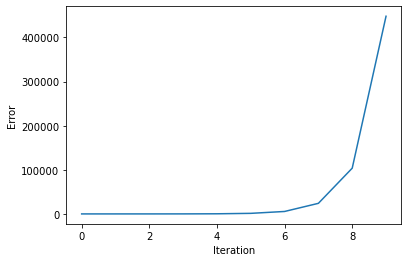

In [82]:
import matplotlib.pyplot as plt
plt.plot(diff_x)
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

### (v) Repeat part (iv) for the Gauss Jacobi method. 

Deliverable(s): The input matrix and the vector, the 10 successive
iterates and the plot

In [83]:
def apply_GJ(A,b,n=10):
    N = len(b)
    x = [0]*N
    tmp_x = [0]*N
    diff_vec_norm = []
    
    for i in range(n):
        C = GJ_iteration(A)
        tmp1 = np.matmul(C,x)
        
        tmp_x = x
        x = tmp1 + b
        diff_x = x - tmp_x
        diff_vec_norm.append(vect_norm_2(diff_x))
        
        print("Iteration: ",i+1)
        print("X = \n",x)
        
    return x,diff_vec_norm

In [86]:
A = np.random.rand(4,4)
b = np.random.rand(4)
print("Random 4x4 matrix: \n",A)
print("Random Vector: \n",b)
result,diff_x = apply_GJ(A,b)
print("Result: \n", result)
print("diff_x: \n", diff_x)

Random 4x4 matrix: 
 [[5.64386749e-01 7.81231937e-01 4.24221442e-01 6.44968758e-01]
 [6.28425792e-01 8.94888036e-01 6.03613438e-01 9.72497710e-01]
 [9.31398577e-02 9.82079265e-01 3.49818186e-01 5.35886066e-01]
 [1.04518654e-01 4.37689467e-01 3.70224871e-04 6.26642814e-01]]
Random Vector: 
 [0.74407137 0.55459531 0.60745097 0.94404768]
Iteration:  1
X = 
 [0.74407137 0.55459531 0.60745097 0.94404768]
Iteration:  2
X = 
 [-1.55903471 -1.40357525 -2.59381556  0.43221741]
Iteration:  3
X = 
 [4.1426332  2.92927127 4.30082995 2.18596507]
Iteration:  4
X = 
 [ -9.04145909  -7.63103465 -12.06784506  -1.79544899]
Iteration:  5
X = 
 [22.42965334 16.994942   27.18856535  7.78924296]
Iteration:  6
X = 
 [-52.11822961 -42.00019977 -65.00841055 -14.68349953]
Iteration:  7
X = 
 [124.52489651  96.96001818 154.88900293  39.01109232]
Iteration:  8
X = 
 [-294.47270138 -233.76068175 -364.51409075  -87.64054268]
Iteration:  9
X = 
 [698.4596286  548.45561884 869.52742712 213.54910388]
Iteration:  10
X 

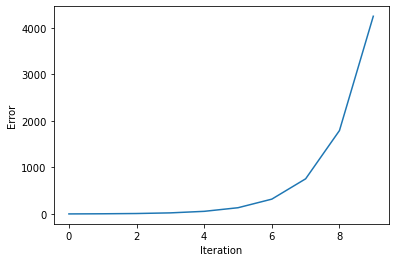

In [87]:
import matplotlib.pyplot as plt
plt.plot(diff_x)
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()